In [376]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [378]:
df = pd.read_csv("Autism_Prediction_Dataset.csv")
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [380]:
df.shape

(800, 22)

### Let’s check which column of the dataset contains which type of data 

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [385]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.582500,0.493455,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.286250,0.452290,0.000000,0.000000,0.000000,1.000000,1.000000
A3_Score,800.0,0.321250,0.467249,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.457500,0.498502,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.208750,0.406670,0.000000,0.000000,0.000000,0.000000,1.000000
A7_Score,800.0,0.273750,0.446161,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.717500,0.450497,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.316250,0.465303,0.000000,0.000000,0.000000,1.000000,1.000000


In [387]:
df.isnull().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

### Data Cleaning
The data which is obtained from the primary sources is termed the raw data and required a lot of preprocessing before we can derive any conclusions from it or to some modeling on it. Those preprocessing steps are known as data cleaning and it includes, outliers removal, null value imputation, and removing discrepancies of any sort in the data inputs.

In [390]:
df['ethnicity'].value_counts()

ethnicity
White-European     211
?                  151
Asian              134
Middle Eastern     116
Black               45
Latino              44
South Asian         35
Others              24
Pasifika            18
Hispanic            16
Turkish              4
others               2
Name: count, dtype: int64

In [392]:
df['relation'].value_counts()

relation
Self                        617
?                            77
Parent                       49
Relative                     43
Health care professional      7
Others                        7
Name: count, dtype: int64

In [394]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})

In [396]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,0,0,United States,0,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,0,0,Australia,0,10.544296,18 and more,Others,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,0,0,United Kingdom,0,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,0,0,New Zealand,0,1.530098,18 and more,Others,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,0,1,Italy,0,7.949723,18 and more,Self,0


In [398]:
df.duplicated().sum()

0

### Exploratory Data Analysis
EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. Here we will see how to check the data imbalance and skewness of the data.


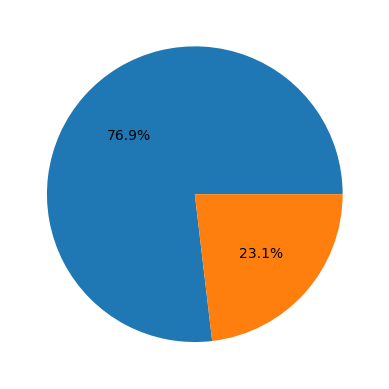

In [401]:
plt.pie(df['Class/ASD'].value_counts().values,autopct='%1.1f%%')
plt.show()

### The dataset we have is highly imbalanced. If we will train our model using this data then the model will face a hard time predicting the positive class which is our main objective here to predict whether a person has autism or not with high accuracy.

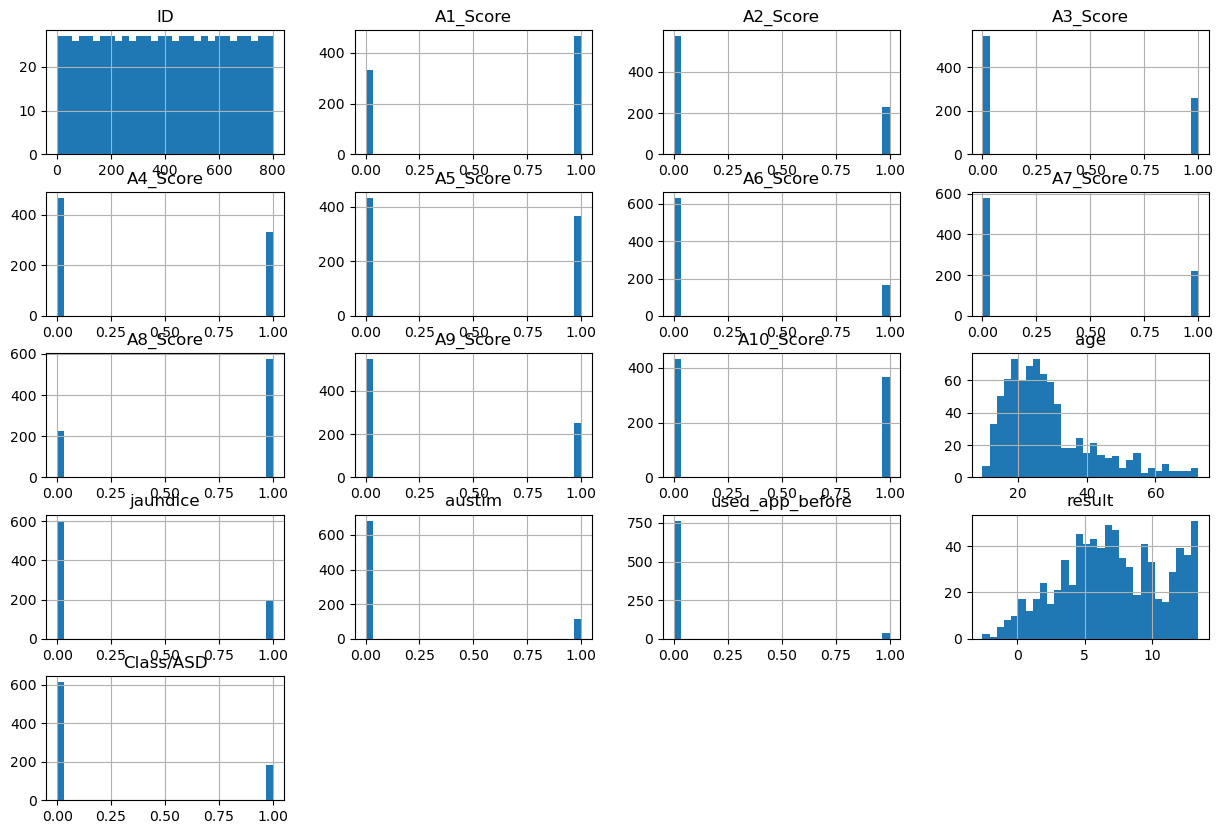

In [404]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

In [406]:
# Applying log transformations to remove the skewness of the data.
df['age'] = df['age'].apply(lambda x: np.log(x))

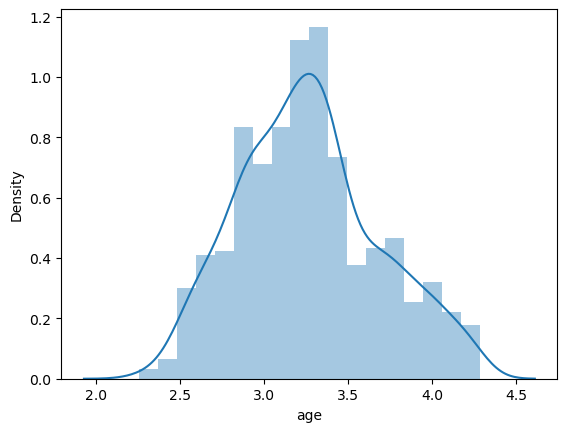

In [408]:
sns.distplot(df['age'])
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

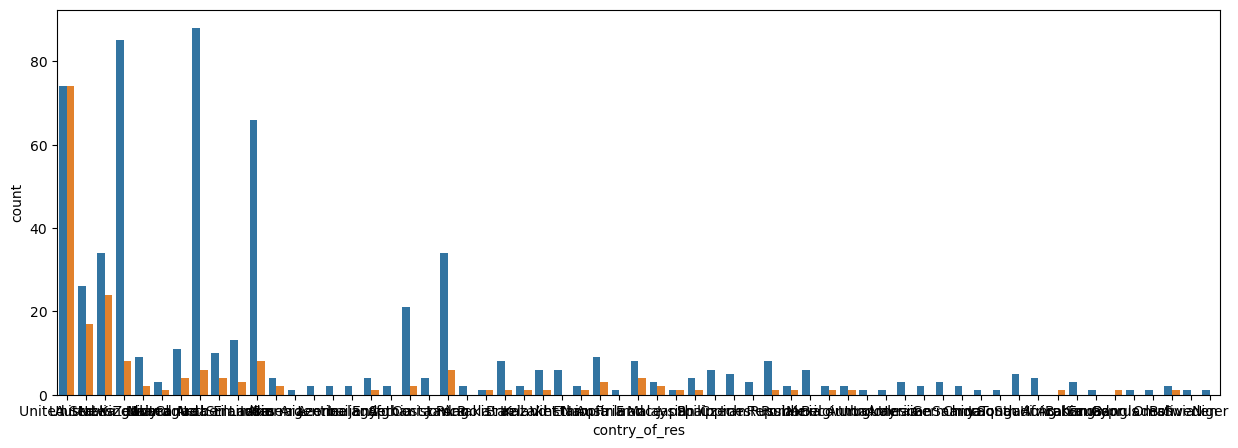

In [410]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='contry_of_res', hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()

### In some places approximately 50% of the data available for that country have autism and in some places, this is quite low. This implies that the geography of a person also gives an idea of having autism.

In [ ]:
sns.boxplot(df)
plt.xticks(rotation=90)

### divide categoriacal and numarical

In [414]:
df_numeric_features = df.select_dtypes(include=np.number) 

In [416]:
df_numeric_features.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'jaundice', 'austim', 'used_app_before', 'result', 'Class/ASD'],
      dtype='object')

<Axes: >

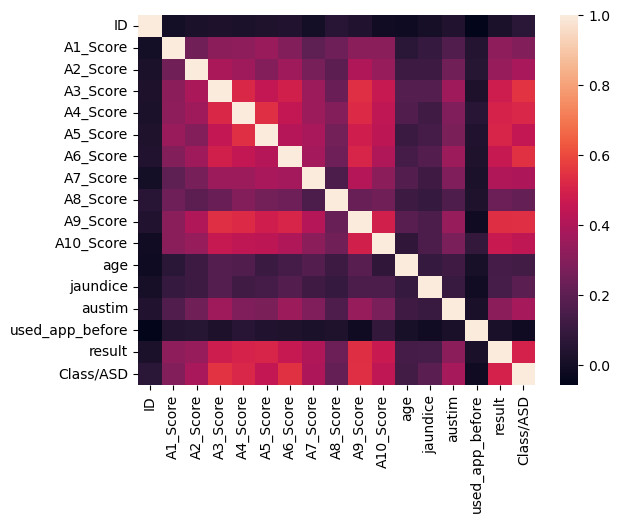

In [418]:
sns.heatmap(df_numeric_features.corr())

In [419]:
def encode_labels(data):
    for col in data.columns:
      if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
    
    return data

df = encode_labels(df)

In [422]:
df

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,0,9,0,0,58,0,7.819715,0,4,0
1,2,0,0,0,0,0,0,0,0,0,...,0,7,0,0,6,0,10.544296,0,1,0
2,3,1,1,1,1,1,1,0,0,1,...,0,9,0,0,57,0,13.167506,0,4,1
3,4,0,0,0,1,0,0,0,0,0,...,0,7,0,0,39,0,1.530098,0,1,0
4,5,0,0,0,0,1,0,0,0,1,...,1,1,0,1,32,0,7.949723,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,1,1,1,1,1,1,1,1,1,...,0,9,0,1,58,0,13.390868,0,4,1
796,797,1,1,0,0,1,0,0,0,1,...,0,0,0,0,39,0,9.454201,0,4,0
797,798,0,0,0,0,0,0,1,0,1,...,1,9,1,0,34,0,6.805509,0,4,1
798,799,1,1,1,1,1,1,0,1,1,...,0,4,0,1,58,0,3.682732,0,3,0


### From the above heat map, we can see that there are only one highly correlated features which we will remove before training the model on this data as highly correlated features do not help in learning useful patterns in the data.

In [425]:
def add_feature(data):
  
  # Creating a column with all values zero
  data['sum_score'] = 0
  for col in data.loc[:,'A1_Score':'A10_Score'].columns:
    
    # Updating the 'sum_score' value with scores
    # from A1 to A10
    data['sum_score'] += data[col]

  # Creating a random data using the below three columns
  data['ind'] = data['austim'] + data['used_app_before'] + data['jaundice']

  return data

df = add_feature(df)

### In the above code block, we have just summed up the clinical scores given from A1 to A10. 

AttributeError: 'numpy.int64' object has no attribute 'startswith'

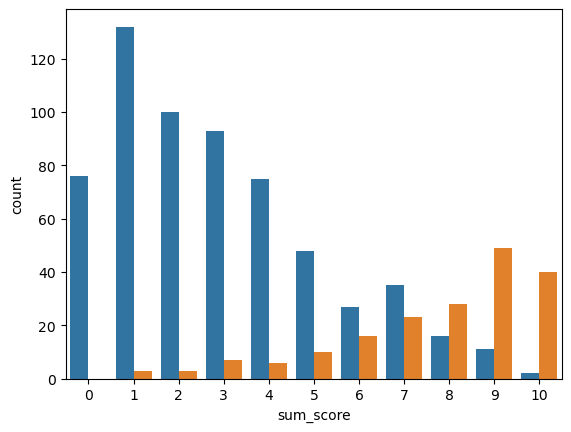

In [428]:
sns.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()

### Another amazing observation higher the sum score higher the chances of having autism is higher as well and similarly for lower sum scores that are for less than 5 it is rare that the person has autism.

In [430]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [432]:
x=df.drop(['ethnicity','contry_of_res','used_app_before','age_desc','relation','Class/ASD'],axis=1)
y=df['Class/ASD']

In [434]:
print(x.shape)
print(y.shape)

(800, 18)
(800,)


In [436]:
y.value_counts()

Class/ASD
0    615
1    185
Name: count, dtype: int64

### Oversampling

In [439]:
from imblearn.over_sampling import RandomOverSampler
random = RandomOverSampler(random_state=42)
X_resample, y_resample = random.fit_resample(x,y)

In [441]:
X_resample.shape, y_resample.shape 

((1230, 18), (1230,))

In [490]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,cohen_kappa_score,precision_score,roc_auc_score,f1_score

### # Split data into training and validation sets

In [445]:
x_train,x_test,y_train,y_test=train_test_split(X_resample, y_resample,test_size=0.3,random_state=42)

###  Logistic regression

In [448]:
model=LogisticRegression(max_iter=1000)

In [450]:
# Initialize and fit the logistic regression model
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [451]:
# Make predictions
y_pred = model.predict(x_test)
model.score(x_test,y_test) 

0.8428184281842819

In [460]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("accuracy =", accuracy_score(y_test,y_pred)*100)
print("kappa_score = ",cohen_kappa_score(y_test,y_pred)*100)
print("precesion =",precision_score( y_test,y_pred)*100)
roc_auc_score = roc_auc_score(y_test,model.predict_proba(x_test)[:, 1]  )
print("f1 =", f1_score(y_test,y_pred)*100)
print("roc_auc_score=",roc_auc_score)

[[163  33]
 [ 25 148]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       196
           1       0.82      0.86      0.84       173

    accuracy                           0.84       369
   macro avg       0.84      0.84      0.84       369
weighted avg       0.84      0.84      0.84       369

accuracy = 84.28184281842819
kappa_score =  68.52647058823528
precesion = 81.76795580110497
f1 = 83.61581920903957
roc_auc_score= 0.894892060870591


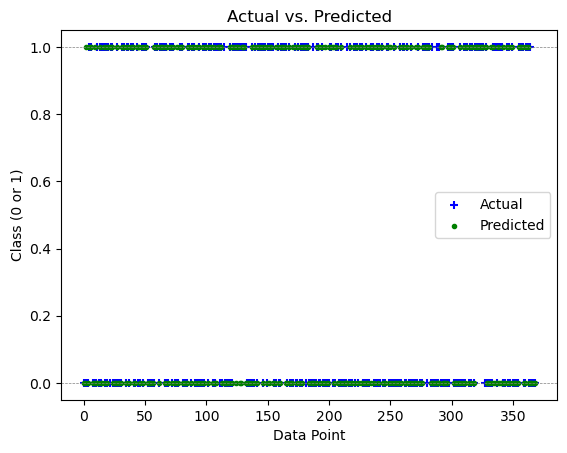

In [462]:
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual',marker='+')
plt.scatter(np.arange(len(y_pred)), y_pred, color='green', label='Predicted', marker='.')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(y=1, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Data Point')
plt.ylabel('Class (0 or 1)')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

###  This plot helps you see how well your model is performing by comparing the actual class labels with the predicted ones. The blue + markers show where the actual values are, and the green . markers indicate the predictions made by your model. By looking at how close the green dots are to the blue plus signs, you can get a sense of how accurate your predictions are. The horizontal lines at 0 and 1 serve as reference points, marking the boundaries between different classes, making it easier to understand where the predictions fall in relation to the actual values.

In [464]:
df_logistic_model = pd.DataFrame({'Model':' Logistic_Regression Model',
                         'accuracy_score':[accuracy],
                        'kappa_score':[kappa_score],
                         'precesion':[precesion],
                         'F1_SCORE':[f1],
                        'roc_auc_score':[roc_auc_score]})

In [466]:
df_logistic_model

,Model,accuracy_score,kappa_score,precesion,F1_SCORE,roc_auc_score
0,Logistic_Regression Model,0.837398,0.674191,0.815642,0.829545,0.894892


### DecisionTreeClassifier

In [468]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree

In [470]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3, random_state = 42)
print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (861, 18)
The shape of X_test is: (369, 18)
The shape of y_train is: (861,)
The shape of y_test is: (369,)


In [480]:
dtr = DecisionTreeClassifier(criterion="entropy", max_depth=5)
dtr 

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [482]:
dtr_model = dtr.fit(X_train,y_train)

In [484]:
y_pred = dtr_model.predict(X_test)

In [494]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy_dt =accuracy_score(y_test,y_pred)
kappa_score_dt = cohen_kappa_score(y_test,y_pred)
precesion_dt =precision_score( y_test,y_pred)
f1_dt = f1_score(y_test,y_pred)
roc_auc_score_dt = roc_auc_score(y_test,model.predict_proba(x_test)[:, 1]  )
print("Accuracy=",accuracy_dt)
print("kappa_score=",kappa_score_dt)
print("precesion=",precesion_dt)
print("f1_score=",f1_dt)
print("roc_auc_score=",roc_auc_score_dt)

[[163  33]
 [ 32 141]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       196
           1       0.81      0.82      0.81       173

    accuracy                           0.82       369
   macro avg       0.82      0.82      0.82       369
weighted avg       0.82      0.82      0.82       369

Accuracy= 0.8238482384823849
kappa_score= 0.6464423119444567
precesion= 0.8103448275862069
f1_score= 0.8126801152737751
roc_auc_score= 0.894892060870591


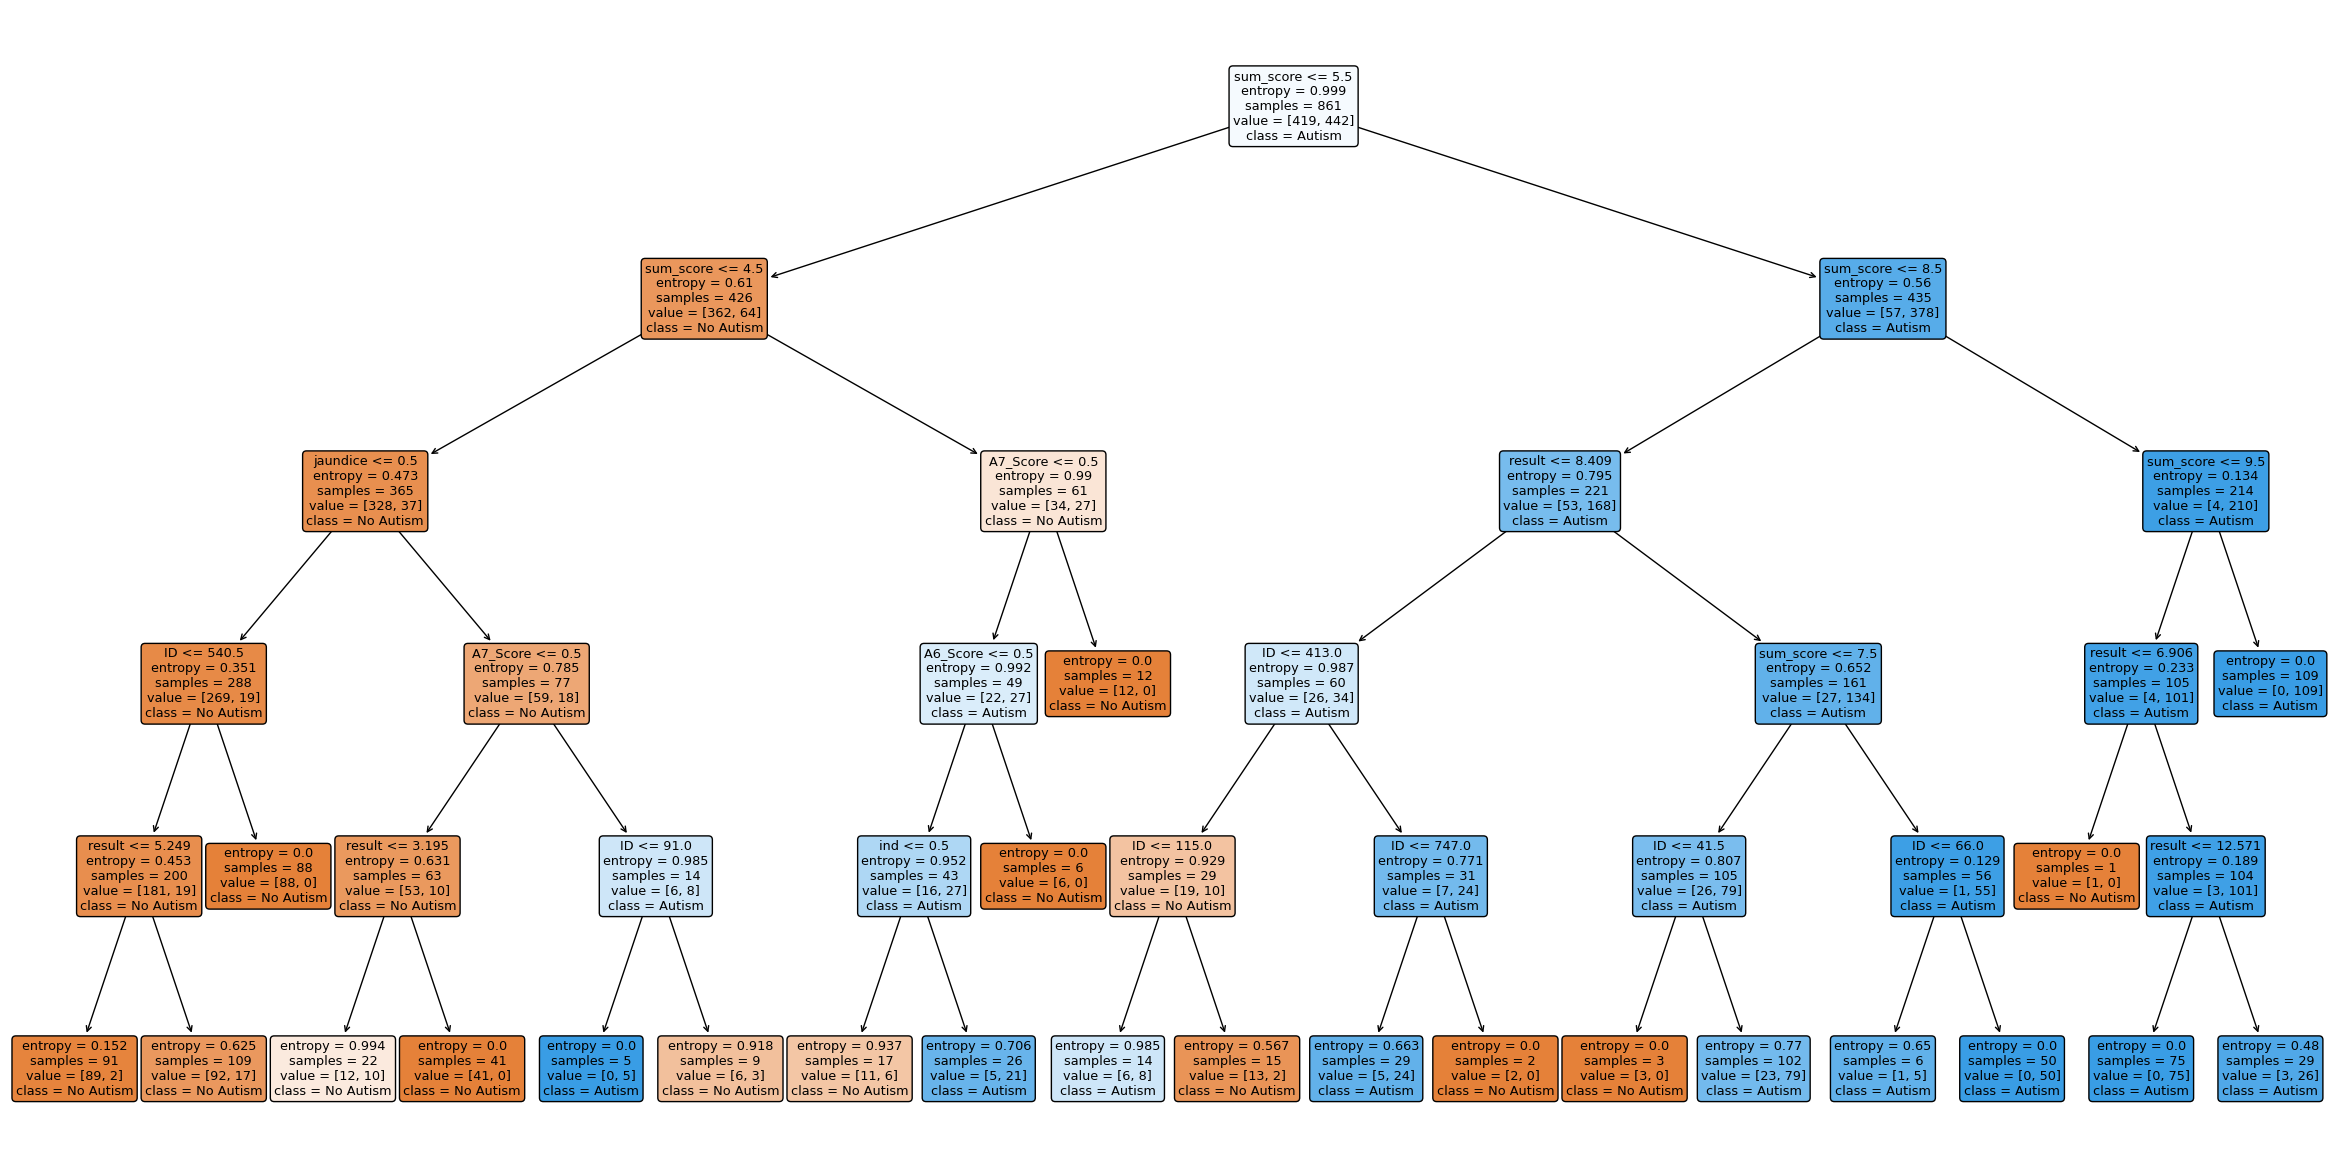

In [496]:
plt.figure(figsize=(30, 15))
plot_tree(dtr_model, feature_names=x.columns, class_names=["No Autism", "Autism"], filled=True, rounded=True)
plt.show()

In [498]:
df_Decision_tree_model = pd.DataFrame({'Model':'DecisionTreeClassifier Model',
                         'accuracy_score':[accuracy_dt],
                        'kappa_score':[kappa_score_dt],
                         'precesion':[precesion_dt],
                         'F1_SCORE':[f1_dt],
                        'roc_auc_score':[roc_auc_score_dt]})

In [500]:
df1 = pd.concat([df_logistic_model,df_Decision_tree_model],axis =0,ignore_index = True )

In [502]:
df1

,Model,accuracy_score,kappa_score,precesion,F1_SCORE,roc_auc_score
0,Logistic_Regression Model,0.837398,0.674191,0.815642,0.829545,0.894892
1,DecisionTreeClassifier Model,0.823848,0.646442,0.810345,0.812680,0.894892


### Decesion Tree Classifier with pruning

In [504]:
from sklearn.model_selection import GridSearchCV

In [506]:
tuned_paramaters = [{'criterion': ['gini', 'entropy'],
                     'min_samples_split': [10, 20, 30],
                     'max_depth': [3, 5, 7, 9],
                     'min_samples_leaf': [15, 20, 25, ],
                     'max_leaf_nodes': [5, 10, 15, 20],
                    
                    }]

In [508]:
decision_tree_class = DecisionTreeClassifier(random_state = 42)

In [510]:
grid = GridSearchCV(decision_tree_class,tuned_paramaters, cv = 5,scoring = 'r2')
dt_grid = grid.fit(X_train, y_train)

print('Best parameters for decision tree classifier: ', dt_grid.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 15, 'min_samples_leaf': 20, 'min_samples_split': 10} 



In [511]:
y_pred = grid.predict(X_test)

In [512]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy_dtp =accuracy_score(y_test,y_pred)
kappa_score_dtp = cohen_kappa_score(y_test,y_pred)
precesion_dtp =precision_score( y_test,y_pred)
f1_dtp = f1_score(y_test,y_pred)
roc_auc_score_dtp = roc_auc_score(y_test,model.predict_proba(x_test)[:, 1]  )
print("Accuracy=",accuracy_dtp)
print("kappa_score=",kappa_score_dtp)
print("precesion=",precesion_dtp)
print("f1_score=",f1_dtp)
print("roc_auc_score=",roc_auc_score_dtp)

[[160  36]
 [ 35 138]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       196
           1       0.79      0.80      0.80       173

    accuracy                           0.81       369
   macro avg       0.81      0.81      0.81       369
weighted avg       0.81      0.81      0.81       369

Accuracy= 0.8075880758807588
kappa_score= 0.6138062176624066
precesion= 0.7931034482758621
f1_score= 0.7953890489913544
roc_auc_score= 0.894892060870591


In [518]:
df_Decision_model_Pruning = pd.DataFrame({'Model':'DecisionTreeClassifier with Pruning Model',
                         'accuracy_score':[accuracy_dtp],
                        'kappa_score':[kappa_score_dtp],
                         'precesion':[precesion_dtp],
                         'F1_SCORE':[f1_dtp],
                         'roc_auc_score' :[roc_auc_score_dtp]                 
                        })

In [520]:
df2 = pd.concat([df1,df_Decision_model_Pruning],axis =0,ignore_index = True )

In [522]:
df2

,Model,accuracy_score,kappa_score,precesion,F1_SCORE,roc_auc_score
0,Logistic_Regression Model,0.837398,0.674191,0.815642,0.829545,0.894892
1,DecisionTreeClassifier Model,0.823848,0.646442,0.810345,0.812680,0.894892
2,DecisionTreeClassifier with Pruning Model,0.807588,0.613806,0.793103,0.795389,0.894892


### RandomForestClassifier

In [524]:
from sklearn.ensemble import RandomForestClassifier#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,cohen_kappa_score,precision_score,roc_auc_score, f1_scoret

In [526]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample,  test_size = 0.30, random_state = 10)


print("X_train",X_train.shape)
print("y_train",y_train.shape)


print("X_test",X_test.shape)
print("y_test",y_test.shape)


X_train (861, 18)
y_train (861,)
X_test (369, 18)
y_test (369,)


In [528]:
rf_classifier = RandomForestClassifier()
rf_classifier

RandomForestClassifier()

In [530]:
rf_classifier_model = rf_classifier.fit(X_train,y_train)

In [532]:
y_pred = rf_classifier_model.predict(X_test)

In [534]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy_rf =accuracy_score(y_test,y_pred)
kappa_score_rf = cohen_kappa_score(y_test,y_pred)
precesion_rf=precision_score( y_test,y_pred)
f1_rf = f1_score(y_test,y_pred)
roc_auc_score_rf = roc_auc_score(y_test,model.predict_proba(x_test)[:, 1]  )
print("Accuracy=",accuracy_rf)
print("kappa_score=",kappa_score_rf)
print("precesion=",precesion_rf)
print("f1_score=",f1_rf)
print("roc_auc_score=",roc_auc_score_rf)

[[165  19]
 [  3 182]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       184
           1       0.91      0.98      0.94       185

    accuracy                           0.94       369
   macro avg       0.94      0.94      0.94       369
weighted avg       0.94      0.94      0.94       369

Accuracy= 0.940379403794038
kappa_score= 0.8807299012693935
precesion= 0.9054726368159204
f1_score= 0.9430051813471503
roc_auc_score= 0.4805669800235018


In [536]:
df_random_forest_model = pd.DataFrame({'Model':'Random Forest Classifier Model',
                         'accuracy_score':[accuracy_rf],
                        'kappa_score':[kappa_score_rf],
                         'precesion':[precesion_rf],
                         'F1_SCORE':[f1_rf],
                        'roc_auc_score':[roc_auc_score_rf]})

In [538]:
df3 = pd.concat([df_random_forest_model,df2],axis =0,ignore_index = True )

In [540]:
df3

,Model,accuracy_score,kappa_score,precesion,F1_SCORE,roc_auc_score
0,Random Forest Classifier Model,0.940379,0.880730,0.905473,0.943005,0.480567
1,Logistic_Regression Model,0.837398,0.674191,0.815642,0.829545,0.894892
2,DecisionTreeClassifier Model,0.823848,0.646442,0.810345,0.812680,0.894892
3,DecisionTreeClassifier with Pruning Model,0.807588,0.613806,0.793103,0.795389,0.894892


### Tuning randomforestclassifier

In [542]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
rand_search = RandomizedSearchCV(rf_classifier_model, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000209F8116B10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000209F88EC450>})

In [543]:
best_rf = rand_search.best_estimator_
print(best_rf)

RandomForestClassifier(max_depth=1, n_estimators=345)


In [546]:
y_pred = rand_search.predict(X_test)

In [548]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy_rfp =accuracy_score(y_test,y_pred)
kappa_score_rfp = cohen_kappa_score(y_test,y_pred)
precesion_rfp =precision_score( y_test,y_pred)
f1_rfp = f1_score(y_test,y_pred)
roc_auc_score_rfp = roc_auc_score(y_test,model.predict_proba(x_test)[:, 1]  )
print("Accuracy=",accuracy_rfp)
print("kappa_score=",kappa_score_rfp)
print("precesion=",precesion_rfp)
print("f1_score=",f1_rfp)
print("roc_auc_score=",roc_auc_score_rfp)

[[146  38]
 [ 29 156]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       184
           1       0.80      0.84      0.82       185

    accuracy                           0.82       369
   macro avg       0.82      0.82      0.82       369
weighted avg       0.82      0.82      0.82       369

Accuracy= 0.8184281842818428
kappa_score= 0.6368056881785196
precesion= 0.8041237113402062
f1_score= 0.8232189973614776
roc_auc_score= 0.4805669800235018


In [550]:
df_Ranom_Forest_pruning_model = pd.DataFrame({'Model':'Random Forest Classifier Model With Pruning',
                         'accuracy_score':[accuracy_rfp],
                        'kappa_score':[kappa_score_rfp],
                         'precesion':[precesion_rfp],
                         'F1_SCORE':[f1_rfp],
                        'roc_auc_score':[roc_auc_score_rfp]})

In [552]:
df4 = pd.concat([df_Ranom_Forest_pruning_model,df3],axis =0,ignore_index = True )

In [554]:
df4

,Model,accuracy_score,kappa_score,precesion,F1_SCORE,roc_auc_score
0,Random Forest Classifier Model With Pruning,0.818428,0.636806,0.804124,0.823219,0.480567
1,Random Forest Classifier Model,0.940379,0.880730,0.905473,0.943005,0.480567
2,Logistic_Regression Model,0.837398,0.674191,0.815642,0.829545,0.894892
3,DecisionTreeClassifier Model,0.823848,0.646442,0.810345,0.812680,0.894892
4,DecisionTreeClassifier with Pruning Model,0.807588,0.613806,0.793103,0.795389,0.894892


### xgboost

In [556]:
from xgboost import XGBClassifier


In [559]:
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.01
)

In [561]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [563]:
y_pred = model.predict(X_test)

In [565]:
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,

In [571]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy_xgb =accuracy_score(y_test,y_pred)
kappa_score_xgb = cohen_kappa_score(y_test,y_pred)
precesion_xgb=precision_score( y_test,y_pred)
f1_xgb = f1_score(y_test,y_pred)
roc_auc_score_xgb = roc_auc_score(y_test,model.predict_proba(x_test)[:, 1]  )
print("Accuracy=",accuracy_xgb)
print("kappa_score=",kappa_score_xgb)
print("precesion=",precesion_xgb)
print("f1_score=",f1_xgb)
print("roc_auc_score=",roc_auc_score_xgb)

[[161  23]
 [ 16 169]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       184
           1       0.88      0.91      0.90       185

    accuracy                           0.89       369
   macro avg       0.89      0.89      0.89       369
weighted avg       0.89      0.89      0.89       369

Accuracy= 0.8943089430894309
kappa_score= 0.7885945969767749
precesion= 0.8802083333333334
f1_score= 0.896551724137931
roc_auc_score= 0.4908636897767333


In [573]:
df_xgboosting_model = pd.DataFrame({'Model':'xgboost Classifier Model With Pruning',
                         'accuracy_score':[accuracy_xgb],
                        'kappa_score':[kappa_score_xgb],
                         'precesion':[precesion_xgb],
                         'F1_SCORE':[f1_xgb],
                        'roc_auc_score':[roc_auc_score_xgb]})

In [575]:
report= pd.concat([df_xgboosting_model,df4],axis =0,ignore_index = True )

In [577]:
report

,Model,accuracy_score,kappa_score,precesion,F1_SCORE,roc_auc_score
0,xgboost Classifier Model With Pruning,0.894309,0.788595,0.880208,0.896552,0.490864
1,Random Forest Classifier Model With Pruning,0.818428,0.636806,0.804124,0.823219,0.480567
2,Random Forest Classifier Model,0.940379,0.880730,0.905473,0.943005,0.480567
3,Logistic_Regression Model,0.837398,0.674191,0.815642,0.829545,0.894892
4,DecisionTreeClassifier Model,0.823848,0.646442,0.810345,0.812680,0.894892
5,DecisionTreeClassifier with Pruning Model,0.807588,0.613806,0.793103,0.795389,0.894892
